## Part II - Relationship between Income Range, Prosper Score, Borrower's Rate and Estimated Returns on Prosper Loans

### by Makhura Mandy Rasemphe


## Investigation Overview

- The purpose of the investigation was to look at the relationship of the features that propser loans uses when giving out loans.
- The focus of this investigation will be on the relationship between income range, prosper score, borrower's rate and estimated returns.

 


## Dataset Overview

The dataset used was from prosper loans and consist of information regarding 113937 loans and 81 features on each loan. No columns or rows were dropped for this investigation.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("prosperLoanData.csv")

## Distribution of Income Range

- The distribution of the income range per loan.
- Most loans are distributed amongts the  25, 000 and  49, 999 dollars income range.
- The least loans are distributed amongst the 0 dollars and not employed

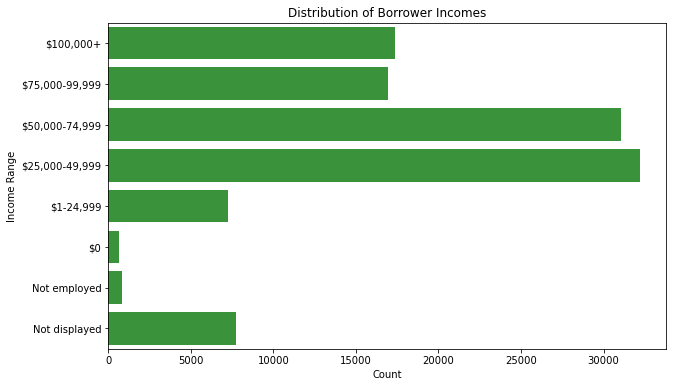

In [3]:
# create ordinal categories for income
ordinal_rating = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0','Not employed','Not displayed' ]
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_rating)
df['IncomeRange'] = df['IncomeRange'].astype(ordered_var)

#plot bar chart
plt.figure(figsize=[10, 6])
base_color = sb.color_palette()[2]
sb.countplot(data = df, y = 'IncomeRange', color = base_color)
plt.ylabel('Income Range')
plt.xlabel('Count')
plt.title('Distribution of Borrower Incomes');

## Distribution of Prosper Score

- The distribution of the peosper score per loan.
- Prosper Score is a risk score built using historical data
- The scores ranges from 1-10 with 10 being the best score.
- Thehighest distribution of scores is amongst the 4.0, 6.0, 8.0 respectively


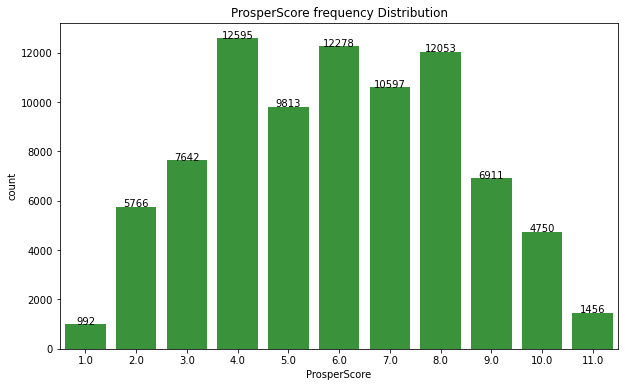

In [4]:
plt.figure(figsize=[10, 6]);
sb.countplot(data = df, x = 'ProsperScore', color = base_color);
plt.title('ProsperScore frequency Distribution');

locs, labels = plt.xticks()
cat_counts = df['ProsperScore'].value_counts()

for loc, label in zip(locs, labels):
    count = cat_counts[float(label.get_text())]
    pct_string = '{}'.format(count)
    plt.text(loc, count, pct_string, ha = 'center', color = 'black')

## Distribution of Borrower's Rate

The borrower's rate is slightly skewed to the right with a peak at 0.3

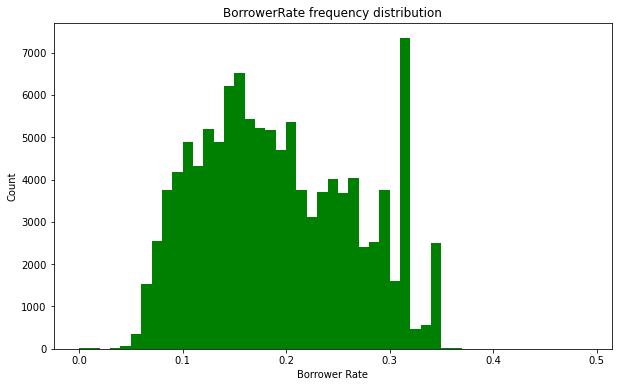

In [5]:
plt.figure(figsize=[10, 6])
b = np.arange(0,df['BorrowerRate'].value_counts().index.max(),0.01)
plt.hist(data = df, x = 'BorrowerRate', bins = b, color='g');

plt.title('BorrowerRate frequency distribution');
plt.xlabel('Borrower Rate');
plt.ylabel('Count');

## Distribution of Estimated Return

- The distribution is skewed to the right with peak at 0.07

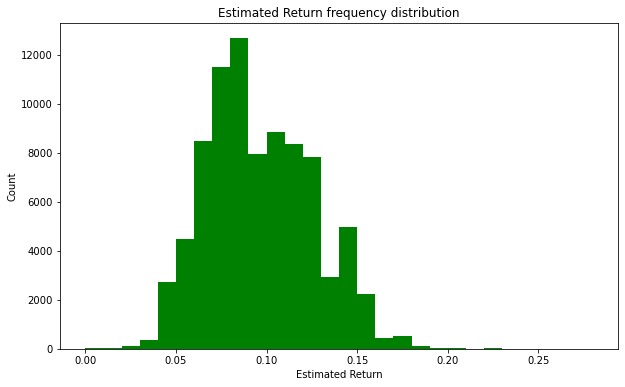

In [6]:
plt.figure(figsize=[10, 6])
b = np.arange(0,df['EstimatedReturn'].value_counts().index.max(),0.01)
plt.hist(data = df, x = 'EstimatedReturn', bins = b, color='g');

plt.title('Estimated Return frequency distribution');
plt.xlabel('Estimated Return');
plt.ylabel('Count');

## Relationship between Income Range, Prosper Score and Borrower's Rate

- The plot deicts that mostly The higher the prosper score, the lower the interest range across all income ranges.

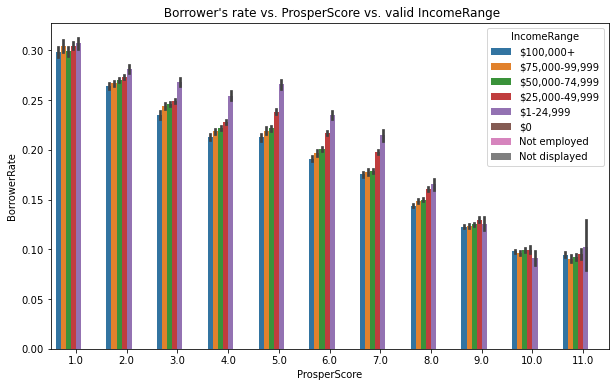

In [7]:
plt.figure(figsize=[10, 6]);
income_range_valid = ['$25,000-49,999','$50,000-74,999','$100,000+','$75,000-99,999','$1-24,999']
income_range_sub = df.loc[df['IncomeRange'].isin(income_range_valid)]

sb.barplot(data = income_range_sub, x = 'ProsperScore', y = 'BorrowerRate', hue = 'IncomeRange');
plt.title(' Borrower\'s rate vs. ProsperScore vs. valid IncomeRange');

## Relationship Prosper Score, Income Range and Estimated Return

- From plot it can be seen that lower income ranges and lower prosper scores are asscociated with highe estimated returns.

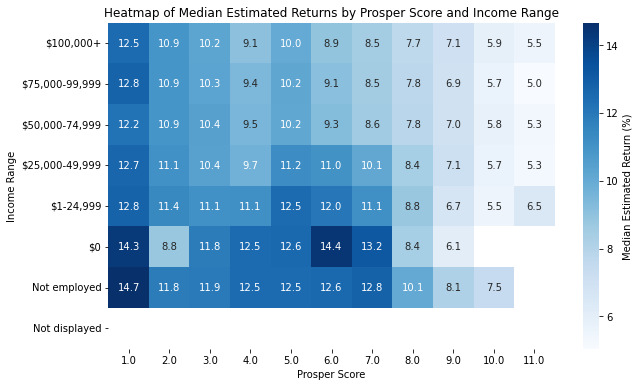

In [8]:
plt.figure(figsize = [10,6])

cat_med = df.groupby(['ProsperScore', 'IncomeRange']).median()['EstimatedReturn']*100
cat_med = cat_med.reset_index(name = 'EstimatedReturnMedian')
cat_med = cat_med.pivot(index = 'IncomeRange', columns = 'ProsperScore', values = 'EstimatedReturnMedian')

sb.heatmap(cat_med, annot = True, fmt = '.1f', cmap = "Blues", cbar_kws = {'label' : 'Median Estimated Return (%)'})
plt.xlabel('Prosper Score')
plt.ylabel('Income Range')
plt.title('Heatmap of Median Estimated Returns by Prosper Score and Income Range');

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt